# Assignment 1
Collaborated with Kalia and Yoav

---

## Moore's Law

In [54]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

In [55]:
benchmarks = pd.read_csv('benchmarks.csv')
print benchmarks.head(10)

                 testID    benchName   base  peak
0  cpu95-20000630-04263  101.tomcatv  153.0   176
1  cpu95-20000630-04263     102.swim  203.0   225
2  cpu95-20000630-04263   103.su2cor   36.5  59.6
3  cpu95-20000630-04263  104.hydro2d   68.3  75.1
4  cpu95-20000630-04263    107.mgrid   94.1  96.5
5  cpu95-20000630-04263    110.applu   50.9  54.2
6  cpu95-20000630-04263   125.turb3d   50.5  85.8
7  cpu95-20000630-04263     141.apsi   80.9  86.8
8  cpu95-20000630-04263    145.fpppp  123.0   131
9  cpu95-20000630-04263    146.wave5   96.7   111


In [56]:
#extracting the date and one of the benchNames (416.gamess)
date = benchmarks['testID']
date = date.str.extract(r'(-[0-9]+-)', expand=False)
benchmarks['testID'] = date.str.replace('-', '')
benchmarks = benchmarks.dropna()

test = benchmarks[benchmarks['benchName'] == '416.gamess']
test['testID'] = test['testID'].apply(lambda x: pd.to_datetime(x))
print test.head()

          testID   benchName  base  peak
45789 2008-09-14  416.gamess  15.9  18.3
45866 2008-04-25  416.gamess  19.0  19.9
45895 2016-06-13  416.gamess  38.2  42.7
45924 2014-01-27  416.gamess  30.6  35.7
45953 2008-03-31  416.gamess  20.7  21.2


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [57]:
#sorting by dates
test = test.sort_values(by='testID')
test = test.sort_index()

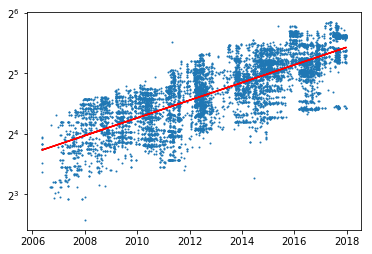

In [58]:
#plotting the general dates
x = test['testID']
y = test['base']
y2=y.apply(lambda x: math.log(x,2))
plt.yscale('log',basey=2)

#training and plotting model
x2 = pd.to_datetime(test['testID'])
x2 = x2.map(dt.datetime.toordinal)
slope, intercept, _, _, _ = stats.linregress(x2, y2)
line = 2**(slope*x2+intercept)
plt.plot_date(x, y, "o", markersize=1)
plt.plot_date(x, line, '-r')
plt.show()

We can see that Moore's law does in fact **not** hold up for this data set (it only doubles performance every 5-6 years). I tested a few other sets and got similar results.

## MNIST Digits

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = load_digits()
X = dataset["data"]
y = dataset["target"]

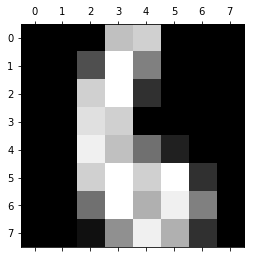

In [4]:
plt.gray() 
plt.matshow(dataset.images[6]) 
plt.show() 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

parameters_n = {'n_neighbors': [1, 3, 5, 7, 9, 15]}
clf = GridSearchCV(KNN(p = 2), parameters_n,
                   cv=5, scoring='accuracy')

clf.fit(X_train, y_train)

print clf

y_pred = clf.predict(X_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [6]:
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print cm, "\n\n" ,classification_rep

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]] 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      1.00      1.00        43
          2       1.00      0.98      0.99        44
          3       0.96      1.00      0.98        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      0.96      0.97        47

avg / total       0.99      0.99      0.99       450



### Training and testing with full data set

In [59]:
training = pd.read_csv('mnist_train.csv')
testing = pd.read_csv('mnist_test.csv')
print training.head(2)

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...    0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...        0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...        0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  

[2 rows x 785 columns]


In [18]:
# picking a subset because it simply takes too long with all the data
training_y = training.iloc[:3000,0]
training_x = training.iloc[:3000,1:]

testing_y = testing.iloc[:100,0]
testing_x = testing.iloc[:100,1:]

In [19]:
parameters_n = {'n_neighbors': [1, 3, 5, 7, 9, 15]}
clf2 = GridSearchCV(KNN(p = 2), parameters_n,
                   cv=5, scoring='accuracy')

clf2.fit(training_x, training_y)

print clf2

y_pred2 = clf2.predict(testing_x)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [20]:
cm = confusion_matrix(testing_y, y_pred2)
classification_rep = classification_report(testing_y, y_pred2)

print cm, "\n\n" ,classification_rep

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  4  0  0  0  0  2  0  0]
 [ 0  1  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  1  0  0  0  5  1  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  1  0  0  0  0  0 12  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0 10]] 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.74      1.00      0.85        14
          2       1.00      0.50      0.67         8
          3       1.00      0.91      0.95        11
          4       1.00      1.00      1.00        14
          5       1.00      0.71      0.83         7
          6       0.92      1.00      0.96        11
          7       0.80      0.86      0.83        14
          8       1.00      1.00      1.00         2
          9       0.91      0.91      0.91        11

avg / total       0.92      0.90      0.90       100



Having increased the amount of training data to a few thousand examples has improved the performance of my classifier from around 85% (at 500 examples) to 90% with 3000. I would expect the performance to further increase with increase in training examples, but eventually level out. 